In [123]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model


In [127]:
#import the dataset 
dataset = pd.read_csv('E:\machine learning\exercises\housing.csv')  


In [128]:
#explore the dataset (i)
dataset.head()


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [129]:
#explore the dataset. view the total number of columns and rows(ii)
dataset.shape

(5000, 7)

In [130]:
#explore the dataset. view the unique values (iii)
dataset.nunique()

Avg. Area Income                5000
Avg. Area House Age             5000
Avg. Area Number of Rooms       4998
Avg. Area Number of Bedrooms     255
Area Population                 5000
Price                           5000
Address                         5000
dtype: int64

In [46]:
#remane the columns
dataset = dataset.rename(columns = {'Avg. Area Income':'Income', 'Avg. Area House Age':'HouseAge', 'Avg. Area Number of Rooms':'No_of_rooms',
                         'Avg. Area Number of Bedrooms':'No_of_bedrooms',})

In [47]:
#data preprocessing to check for NA values
dataset.isna().sum()

Income             0
HouseAge           0
No_of_rooms        2
No_of_bedrooms     0
Area Population    0
Price              0
Address            0
dtype: int64

In [48]:
#deal with the two NA values for the number_of_rooms.
#fill the NA with the average values since a house cant have  rooms
dataset['No_of_rooms'] = dataset['No_of_rooms'].fillna(dataset.No_of_rooms.mean())
dataset.isna().sum()


Income             0
HouseAge           0
No_of_rooms        0
No_of_bedrooms     0
Area Population    0
Price              0
Address            0
dtype: int64

In [74]:
#from visual observation, we can drop the Income, Address and Area Population columns since it will not 
#provide useful information in price determination in the same region
cdataset = dataset.drop(['Area Population', 'Address', 'Income'], axis = 'columns')
cdataset.head()

,HouseAge,No_of_rooms,No_of_bedrooms,Price
0,5.682861,7.009188,4.09,1.059034e+06
1,6.002900,6.730821,3.09,1.505891e+06
2,5.865890,8.512727,5.13,1.058988e+06
3,7.188236,5.586729,3.26,1.260617e+06
4,5.040555,7.839388,4.23,6.309435e+05


In [75]:
#X = cdataset[['Income', 'HouseAge', 'No_of_rooms', 'No_of_bedrooms']]
#Y = cdataset.Price
cdataset.head()

,HouseAge,No_of_rooms,No_of_bedrooms,Price
0,5.682861,7.009188,4.09,1.059034e+06
1,6.002900,6.730821,3.09,1.505891e+06
2,5.865890,8.512727,5.13,1.058988e+06
3,7.188236,5.586729,3.26,1.260617e+06
4,5.040555,7.839388,4.23,6.309435e+05


Text(0.5, 1.0, 'Housing Price KPIs')

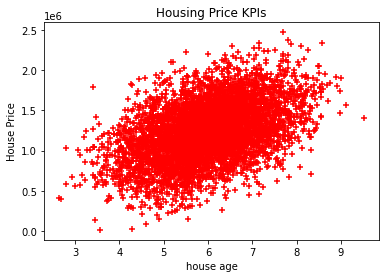

In [78]:
#visulize using matplot
plt.scatter(cdataset.HouseAge, cdataset.Price, marker='+', color = 'red')
plt.xlabel('house age')
plt.ylabel('House Price')
plt.title('Housing Price KPIs')

<AxesSubplot:xlabel='HouseAge', ylabel='Price'>

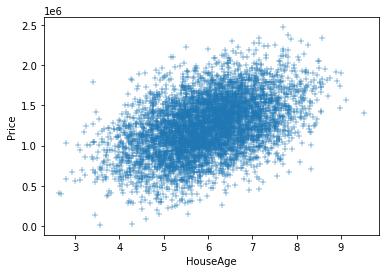

In [83]:
#visulize using seaborn
sns.scatterplot(data=cdataset, x=cdataset.HouseAge, y=cdataset.Price, marker='+')


In [89]:
c = cdataset
c.corr()


,HouseAge,No_of_rooms,No_of_bedrooms,Price
HouseAge,1.000000,-0.009309,0.006149,0.452543
No_of_rooms,-0.009309,1.000000,0.462626,0.335566
No_of_bedrooms,0.006149,0.462626,1.000000,0.171071
Price,0.452543,0.335566,0.171071,1.000000


<AxesSubplot:>

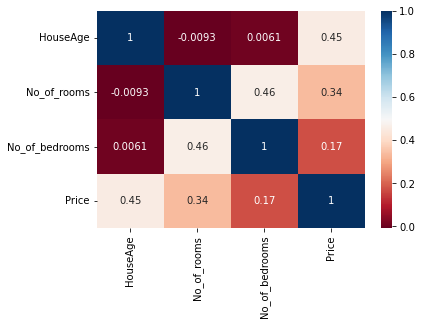

In [103]:
#we visualize the correlation between the variables using a seaborn heatmap
#1.0 represents higher influence between the coupled variables, 0.0 represents small influence
#positive values show linear correlation, negative values show inversely correlated
sns.heatmap(c.corr(), cmap ='RdBu', annot=True)

In [104]:
#now split our data into train and testing sets
from sklearn.model_selection import train_test_split

In [119]:
x_train, x_test, y_train, y_test = train_test_split(cdataset[['HouseAge','No_of_rooms', 'No_of_bedrooms']],
                                                    cdataset.Price, test_size=0.2)

In [120]:
#train out model for house price prediction
mymodel = linear_model.LinearRegression()
mymodel.fit(cdataset[['HouseAge','No_of_rooms', 'No_of_bedrooms']], cdataset.Price)

LinearRegression()

In [121]:
#test the prediction of our model
#give model HouseAge(20),No_of_rooms(4) and No_of_bedrooms(2)
mymodel.predict([[20,4,2]])

array([3149707.5906697])

In [122]:
#evaluate the performance of the model
mymodel.score(x_test, y_test)

0.33015427823394916

In [116]:
mymodel.score(x_train, y_train)

0.310142005172382

In [118]:
#visulize using seaborn
#sns.scatterplot(data=mymodel, x=cdataset.HouseAge, y=cdataset.Price, marker='+')